In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [12]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [13]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values


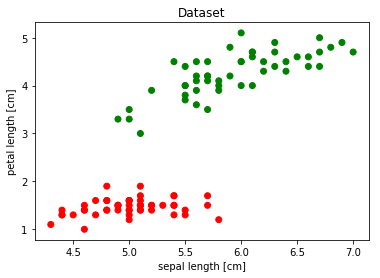

In [14]:
#Dataset
%matplotlib inline
x1 = X[:,0]
y1 = X[:,1]
colors = ['red','green']
plt.scatter(x1,y1, c=y,cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Dataset')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

Weights: [-0.4  -0.68  1.82]


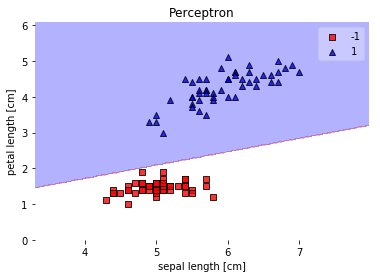

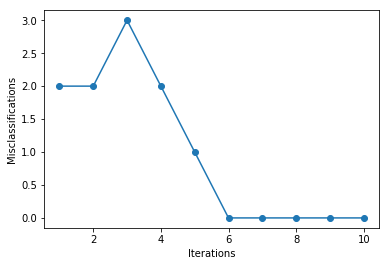

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ppn = Perceptron(epochs=10, eta=0.1)

ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)

plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()



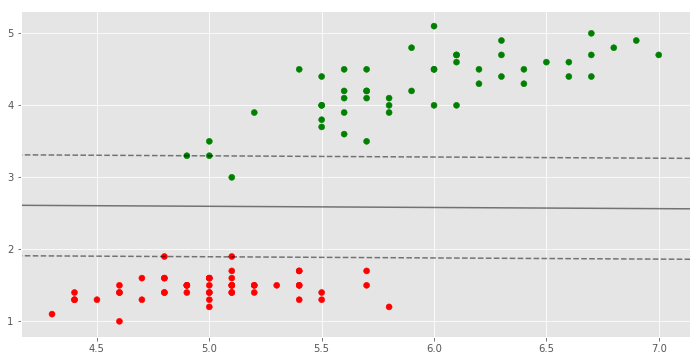

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
#SVM 
%matplotlib inline
from sklearn.svm import SVC

plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')



# A function to draw hyperplane and the margin of SVM classifier
def draw_svm(X, y, C=1.0):
    # Plotting the Points
    colors = ['red', 'green']
    plt.scatter(X[:,0], X[:,1], c=y,cmap=matplotlib.colors.ListedColormap(colors))
    
    # The SVM Model with given C parameter
    clf = SVC(kernel='linear', C=C)
    clf_fit = clf.fit(X, y)
    
    # Limit of the axes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Creating the meshgrid
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # Plotting the boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    # Returns the classifier
    return clf_fit

draw_svm(X,y)

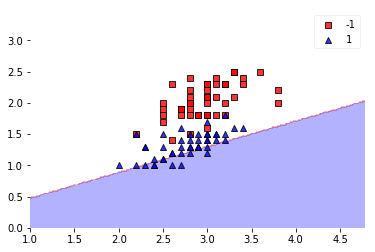

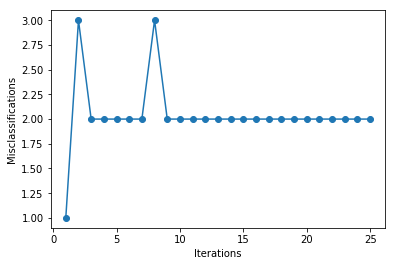

In [18]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)

# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values

ppn = Perceptron(epochs=25, eta=0.01)
ppn.train(X2, y2)

plot_decision_regions(X2, y2, clf=ppn)
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()


